### Start by downloading a bathymetry data file from the Global Multi-Resolution Topography repository, which essentially synthesizes all the topography information for the globe into one database.

### You can query this database by downloading a grid of topography with given latitude and longitude boundaries.

### Bathymetry = Seafloor Topography!!!

In [3]:
# Urllib is a built in library in python
import urllib.request 

#### Specify which coordinates you want your grid to be for!

In [2]:
minlat = 40
maxlat = 44
minlon = -131 
maxlon = -123

In [10]:
# Build the URL
url = 'https://www.gmrt.org/services/GridServer?north=' + str(maxlat) + '&west=' + str(minlon) + '&east=' + str(maxlon) + '&south=' + str(minlat) + '&layer=topo&format=netcdf&resolution=high' 
print(url)

https://www.gmrt.org/services/GridServer?north=44&west=-131&east=-123&south=40&layer=topo&format=netcdf&resolution=high


In [11]:
urllib.request.urlretrieve(url,'gorda_bathy.nc')

('gorda_bathy.nc', <http.client.HTTPMessage at 0x1396ac670>)

#### Great, now we have our datafile. Let's try to plot it up.

In [9]:
import pygmt

In [10]:
topo_data = 'gorda_bathy.nc'

In [11]:
fig = pygmt.Figure()

In [12]:
# make color pallets
pygmt.makecpt(
    cmap='topo',
    series='-8000/8000/1000',
    continuous=True
)

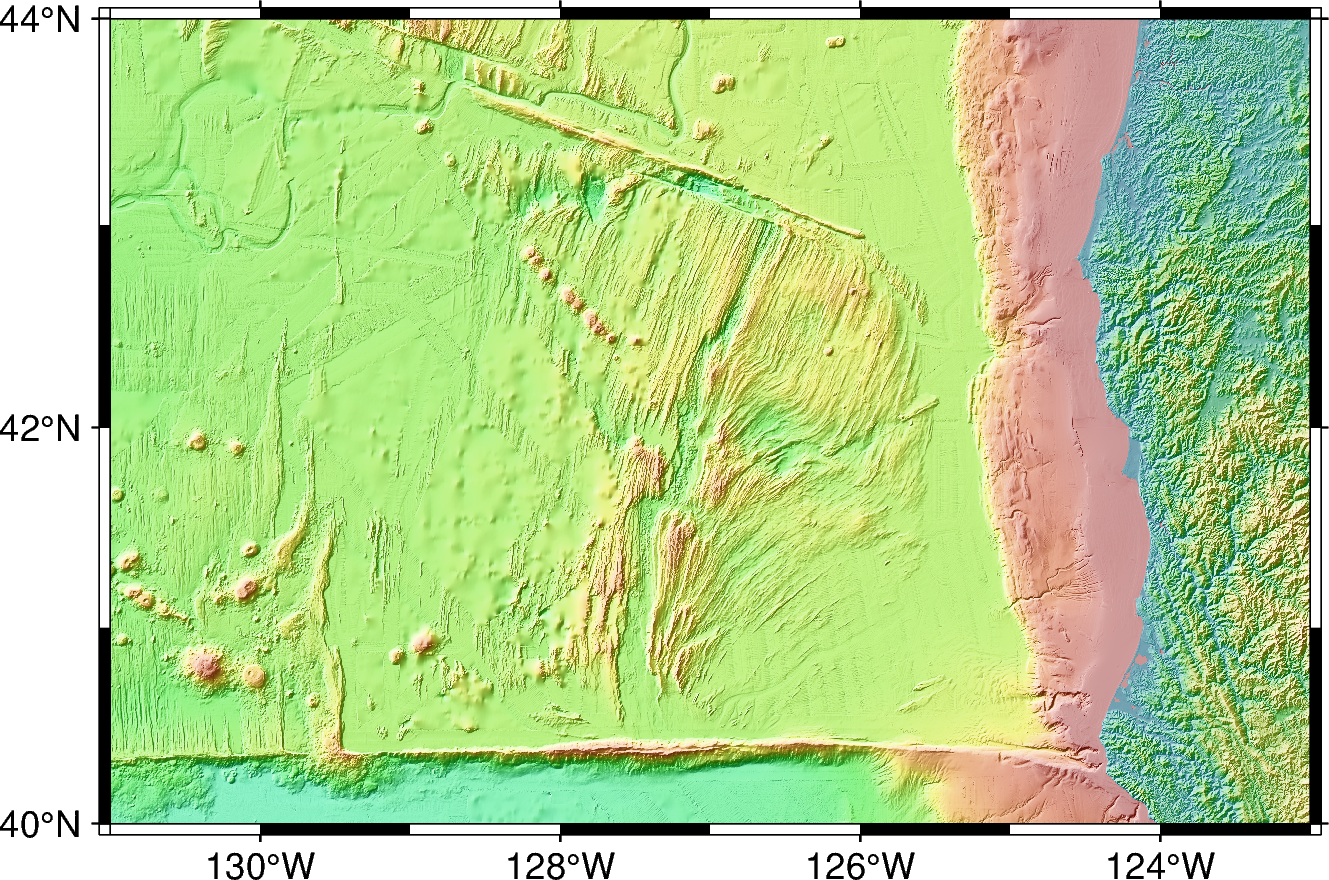

In [13]:
fig.grdimage(
    grid=topo_data,
    region=[minlon, maxlon, minlat, maxlat],
    projection='M4i',
    shading=True,
    frame=True
    )
fig.show()

### Earthquake time!!

In [1]:
import obspy

In [6]:
from obspy.clients.fdsn import Client
import obspy
client = Client("IRIS")

t1 = obspy.UTCDateTime(2006,7,1)
t2 = obspy.UTCDateTime(2007,7,1)

cat = client.get_events(starttime = t1, endtime = t2, minlatitude = minlat, maxlatitude = maxlat, minlongitude = minlon, maxlongitude = maxlon)

times = [ev.origins[0].time.datetime for ev in cat]
lats = [ev.origins[0].latitude for ev in cat]
lons = [ev.origins[0].longitude for ev in cat]
mags = [ev.magnitudes[0].mag for ev in cat]
        

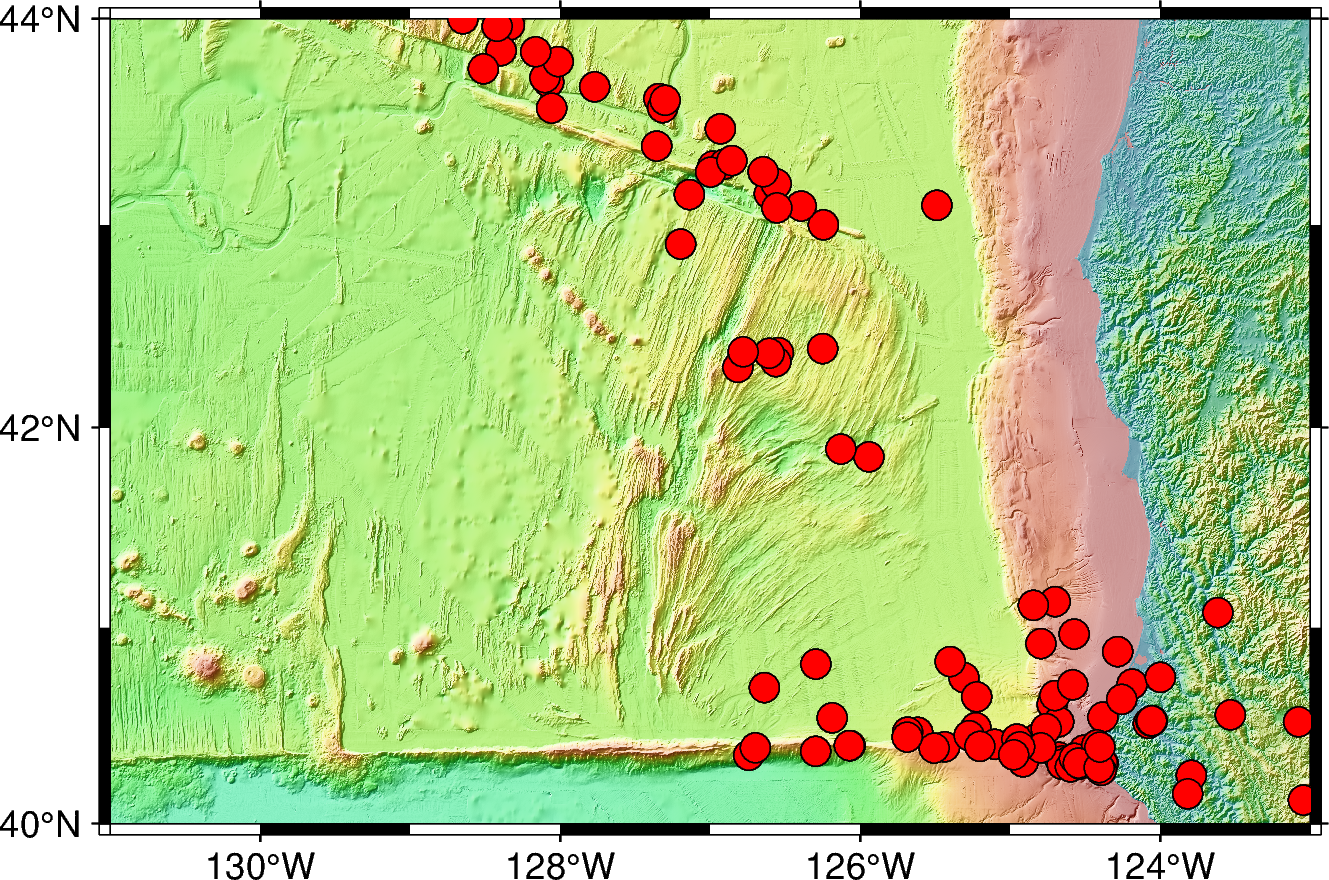

In [15]:
# plot data points
fig.plot(
    x=lons,
    y=lats,
    style='c0.1i',
    color='red',
    pen='black',
    label='something',
    )
fig.show()